In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
!mkdir -p /content/drive/MyDrive/Heart_Disease_Project/{data,notebooks,models,ui,deployment,results}


In [3]:
!wget -O /content/drive/MyDrive/Heart_Disease_Project/data/heart_disease.csv \
https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data


--2025-09-04 04:22:47--  https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘/content/drive/MyDrive/Heart_Disease_Project/data/heart_disease.csv’

/content/drive/MyDr     [ <=>                ]  18.03K  --.-KB/s    in 0.1s    

2025-09-04 04:22:48 (120 KB/s) - ‘/content/drive/MyDrive/Heart_Disease_Project/data/heart_disease.csv’ saved [18461]



In [26]:
with open("/content/drive/MyDrive/Heart_Disease_Project/results/evaluation_metrics.txt", "w") as f:
    f.write(str(results_df))

In [7]:
import pandas as pd

# column names
cols = ["age","sex","cp","trestbps","chol","fbs","restecg","thalach",
        "exang","oldpeak","slope","ca","thal","num"]

# Load dataset
df = pd.read_csv("/content/drive/MyDrive/Heart_Disease_Project/data/heart_disease.csv",
                 names=cols, na_values="?")

print("Dataset shape:", df.shape)
df.head()


Dataset shape: (303, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [8]:
df.info()
print("\nMissing values per column:\n", df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  num       303 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 33.3 KB

Missing values per column:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num     

In [9]:
df = df.dropna()
print("After dropping missing rows:", df.shape)

After dropping missing rows: (297, 14)


In [10]:
# make target binary (0 = no disease, 1 = disease)
df["target"] = (df["num"] > 0).astype(int)
df = df.drop("num", axis=1)

# one-hot encode categorical columns
df = pd.get_dummies(df, columns=["cp","restecg","slope","thal"], drop_first=True)

# scale numerical features
from sklearn.preprocessing import StandardScaler
num_cols = ["age","trestbps","chol","thalach","oldpeak","ca"]
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

# save cleaned dataset
df.to_csv("/content/drive/MyDrive/Heart_Disease_Project/data/heart_disease_cleaned.csv", index=False)
print("Dataset cleaned & saved!")


Dataset cleaned & saved!


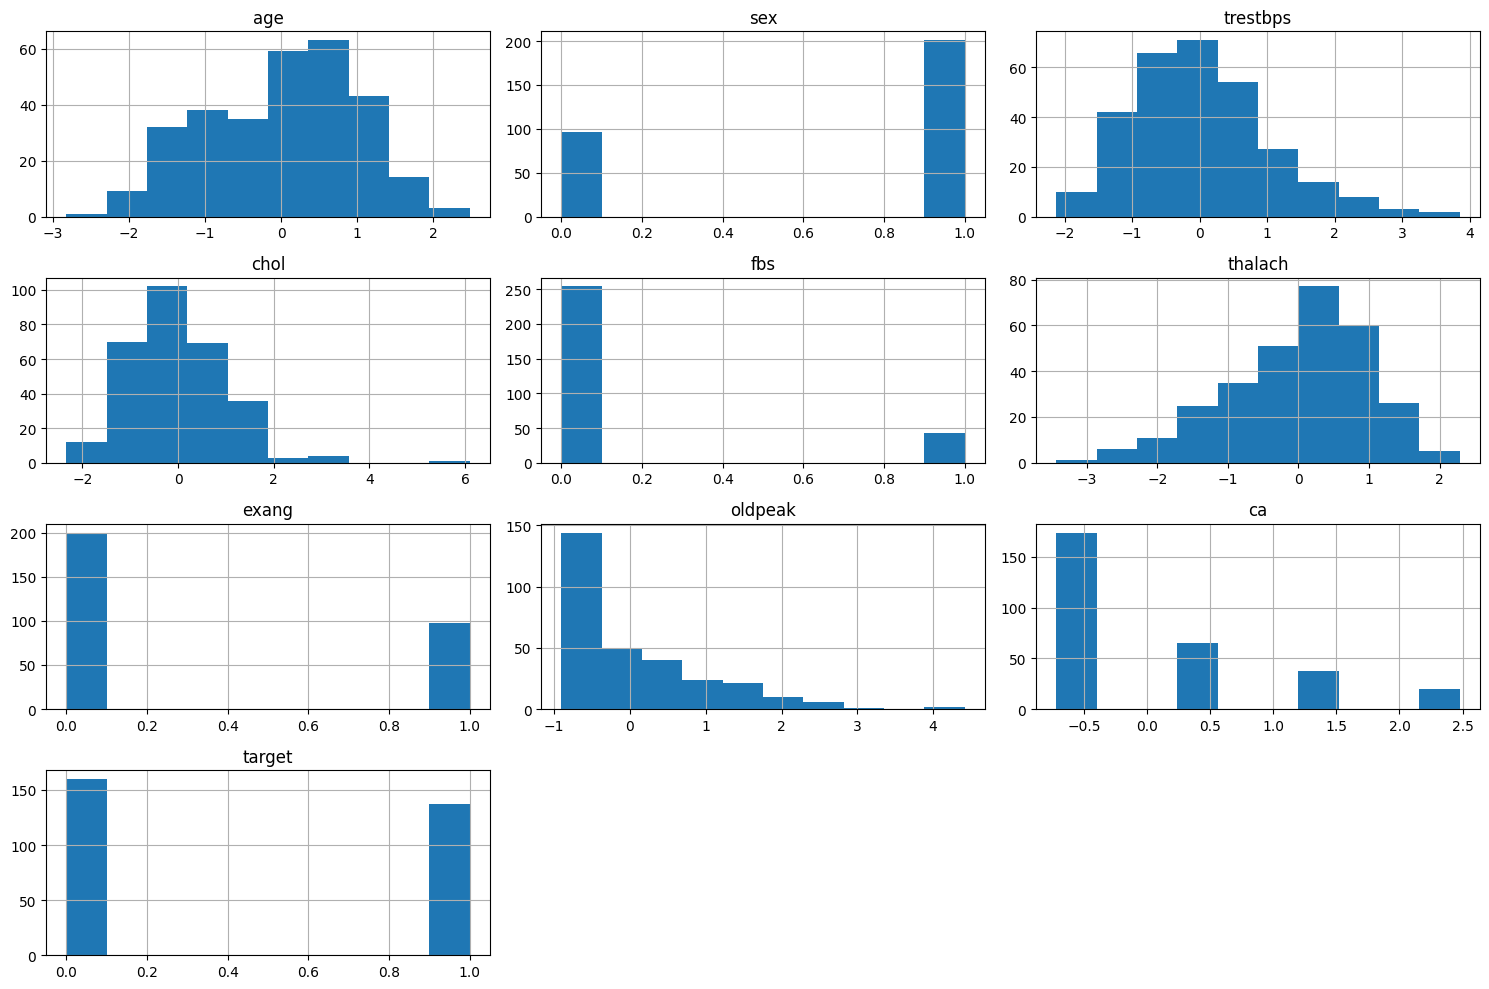

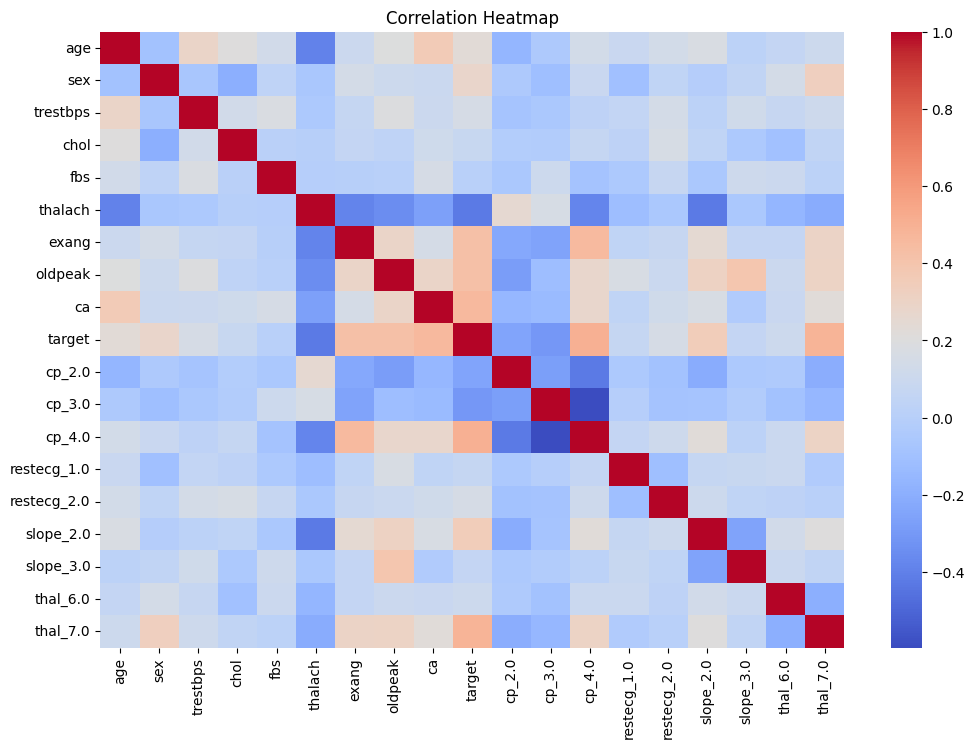

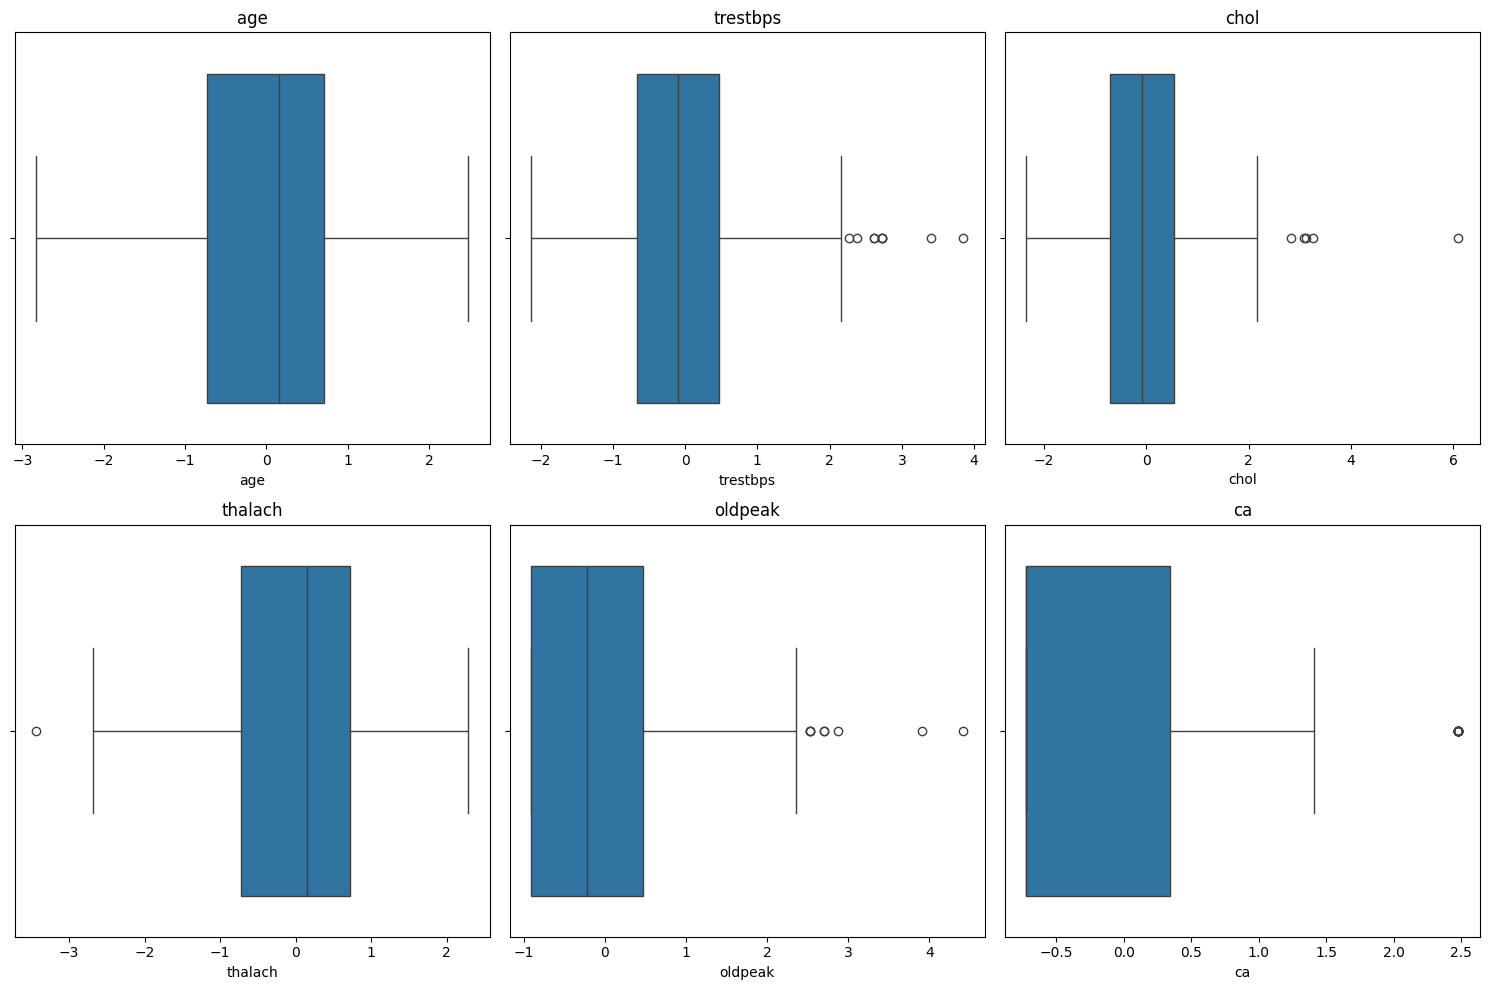

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# histograms for all features
df.hist(figsize=(15, 10))
plt.tight_layout()
plt.show()

# correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# boxplots for numerical features
num_cols = ["age","trestbps","chol","thalach","oldpeak","ca"]
plt.figure(figsize=(15,10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()


Original shape: (297, 18)
Reduced shape: (297, 12)


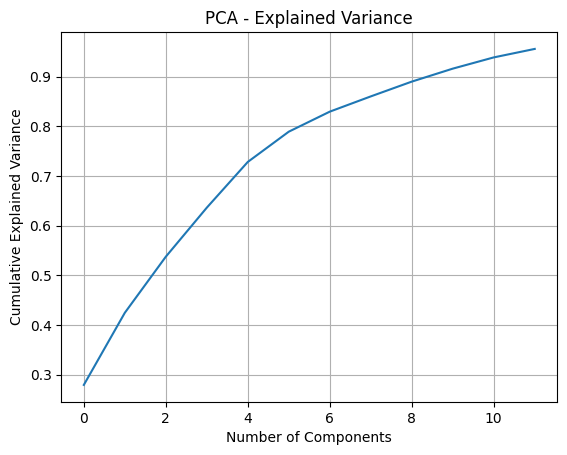

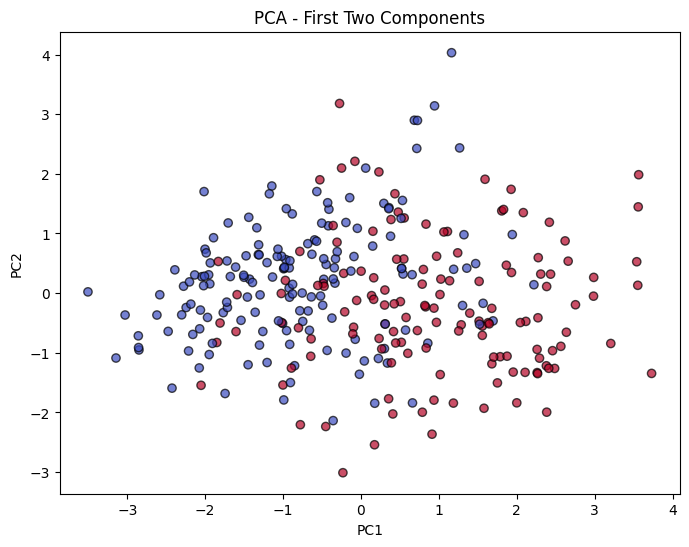

In [13]:
from sklearn.decomposition import PCA
import numpy as np

# load cleaned dataset
df = pd.read_csv("/content/drive/MyDrive/Heart_Disease_Project/data/heart_disease_cleaned.csv")

# separate features and target
X = df.drop("target", axis=1)
y = df["target"]

# apply PCA (keep enough components to explain 95% variance)
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X)

print("Original shape:", X.shape)
print("Reduced shape:", X_pca.shape)

# explained variance plot
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA - Explained Variance")
plt.grid()
plt.show()

# 2D scatter plot of first 2 components
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=y, cmap="coolwarm", edgecolor="k", alpha=0.7)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA - First Two Components")
plt.show()


In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE, chi2, SelectKBest
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler

# reload dataset
df = pd.read_csv("/content/drive/MyDrive/Heart_Disease_Project/data/heart_disease_cleaned.csv")

X = df.drop("target", axis=1)
y = df["target"]


# Random Forest Feature Importance

rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)

importances = pd.Series(rf.feature_importances_, index=X.columns)
top_rf = importances.sort_values(ascending=False).head(8).index.tolist()
print("Top features by RF:", top_rf)


# RFE (Logistic Regression)

log_reg = LogisticRegression(max_iter=1000)
rfe = RFE(log_reg, n_features_to_select=8)
rfe.fit(X, y)

top_rfe = X.columns[rfe.support_].tolist()
print("Top features by RFE:", top_rfe)

# Chi-Square (requires non-negative data)

scaler_mm = MinMaxScaler()
X_mm = pd.DataFrame(scaler_mm.fit_transform(X), columns=X.columns)

chi2_selector = SelectKBest(chi2, k=8)
chi2_selector.fit(X_mm, y)

top_chi2 = X.columns[chi2_selector.get_support()].tolist()
print("Top features by Chi-Square:", top_chi2)

# Combine selected features

final_features = list(set(top_rf + top_rfe + top_chi2))
print("\n Final selected features:", final_features)

# create reduced dataset
df_reduced = df[final_features + ["target"]]

# save reduced dataset
df_reduced.to_csv("/content/drive/MyDrive/Heart_Disease_Project/data/heart_disease_selected.csv", index=False)
print("Reduced dataset saved:", df_reduced.shape)


Top features by RF: ['ca', 'thalach', 'oldpeak', 'cp_4.0', 'thal_7.0', 'age', 'chol', 'trestbps']
Top features by RFE: ['sex', 'exang', 'oldpeak', 'ca', 'cp_2.0', 'cp_4.0', 'slope_2.0', 'thal_7.0']
Top features by Chi-Square: ['exang', 'oldpeak', 'ca', 'cp_2.0', 'cp_3.0', 'cp_4.0', 'slope_2.0', 'thal_7.0']

 Final selected features: ['thalach', 'ca', 'cp_4.0', 'slope_2.0', 'trestbps', 'thal_7.0', 'oldpeak', 'exang', 'chol', 'age', 'cp_2.0', 'cp_3.0', 'sex']
Reduced dataset saved: (297, 14)


In [19]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# load reduced dataset
df = pd.read_csv("/content/drive/MyDrive/Heart_Disease_Project/data/heart_disease_selected.csv")

X = df.drop("target", axis=1)
y = df["target"]

# split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# models to train
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(probability=True, random_state=42)
}

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:,1] if hasattr(model, "predict_proba") else None

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob) if y_prob is not None else None

    results.append([name, acc, prec, rec, f1, auc])

    print(f"\n {name}")
    print(classification_report(y_test, y_pred))

# convert results to dataframe for easy viewing
results_df = pd.DataFrame(results, columns=["Model","Accuracy","Precision","Recall","F1-score","ROC-AUC"])
print("\n Model Comparison:\n")
print(results_df)



 Logistic Regression
              precision    recall  f1-score   support

           0       0.83      0.91      0.87        32
           1       0.88      0.79      0.83        28

    accuracy                           0.85        60
   macro avg       0.85      0.85      0.85        60
weighted avg       0.85      0.85      0.85        60


 Decision Tree
              precision    recall  f1-score   support

           0       0.70      0.81      0.75        32
           1       0.74      0.61      0.67        28

    accuracy                           0.72        60
   macro avg       0.72      0.71      0.71        60
weighted avg       0.72      0.72      0.71        60


 Random Forest
              precision    recall  f1-score   support

           0       0.80      0.88      0.84        32
           1       0.84      0.75      0.79        28

    accuracy                           0.82        60
   macro avg       0.82      0.81      0.81        60
weighted avg       0

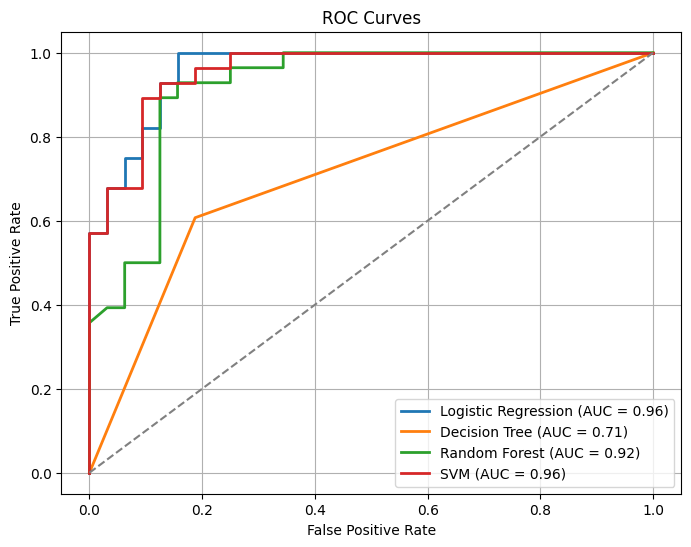

In [20]:
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(8,6))

for name, model in models.items():
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)[:,1]
    else:  # for SVM without probability=True
        y_prob = model.decision_function(X_test)

    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, lw=2, label=f"{name} (AUC = {roc_auc:.2f})")

# random baseline
plt.plot([0,1], [0,1], linestyle="--", color="gray")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves")
plt.legend(loc="lower right")
plt.grid()
plt.show()

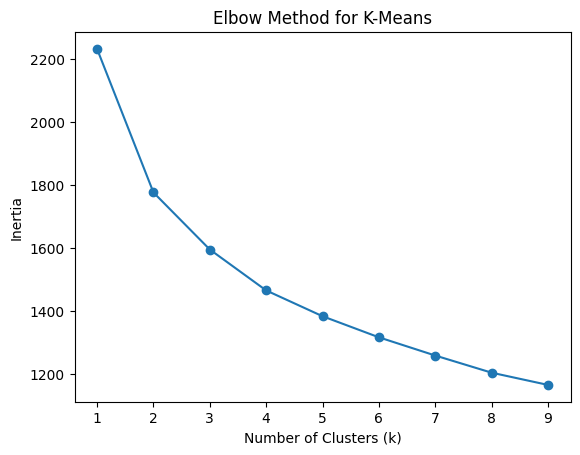


KMeans cluster counts:
 KMeans_cluster
0    156
1    141
Name: count, dtype: int64

Cross-tab with target:
 target            0    1
KMeans_cluster          
0               122   34
1                38  103


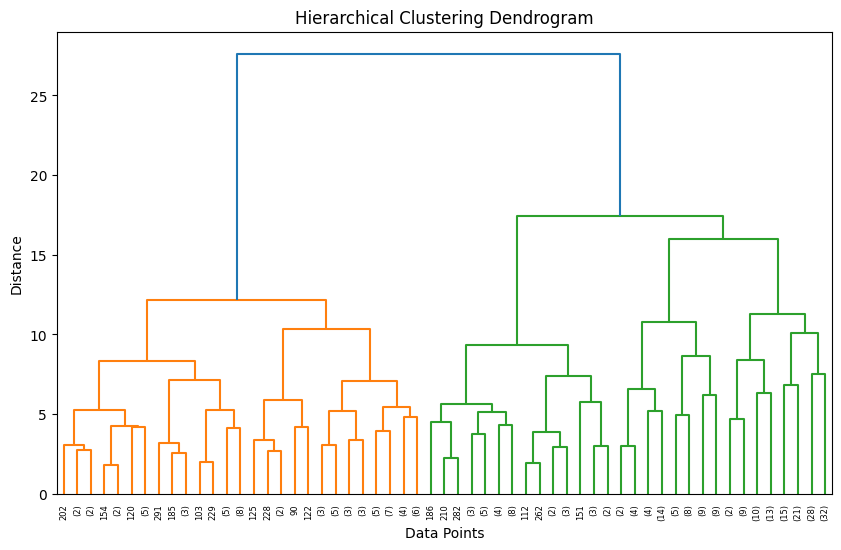


Hierarchical cluster counts:
 Hierarchical_cluster
0    221
1     76
Name: count, dtype: int64

Cross-tab with target:
 target                  0   1
Hierarchical_cluster         
0                     151  70
1                       9  67


In [21]:
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# load reduced dataset (without target for clustering)
df = pd.read_csv("/content/drive/MyDrive/Heart_Disease_Project/data/heart_disease_selected.csv")
X = df.drop("target", axis=1)
y = df["target"]


# K-Means Clustering

# elbow method to find optimal K
inertia = []
K_range = range(1, 10)
for k in K_range:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X)
    inertia.append(km.inertia_)

plt.plot(K_range, inertia, marker="o")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for K-Means")
plt.show()

# choose k=2 (since we expect 2 classes: disease / no disease)
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
clusters_kmeans = kmeans.fit_predict(X)

# compare clusters with actual labels
df["KMeans_cluster"] = clusters_kmeans
print("\nKMeans cluster counts:\n", df["KMeans_cluster"].value_counts())
print("\nCross-tab with target:\n", pd.crosstab(df["KMeans_cluster"], y))


#  Hierarchical Clustering
plt.figure(figsize=(10, 6))
Z = linkage(X, method='ward')
dendrogram(Z, truncate_mode="level", p=5)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()

# Agglomerative clustering with 2 clusters
hc = AgglomerativeClustering(n_clusters=2, linkage="ward")
clusters_hc = hc.fit_predict(X)
df["Hierarchical_cluster"] = clusters_hc

print("\nHierarchical cluster counts:\n", df["Hierarchical_cluster"].value_counts())
print("\nCross-tab with target:\n", pd.crosstab(df["Hierarchical_cluster"], y))


In [22]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

# load reduced dataset
df = pd.read_csv("/content/drive/MyDrive/Heart_Disease_Project/data/heart_disease_selected.csv")
X = df.drop("target", axis=1)
y = df["target"]

# split train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


# Define parameter grid for Random Forest

param_grid = {
    "n_estimators": [50, 100, 200],
    "max_depth": [None, 5, 10, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "bootstrap": [True, False]
}


# GridSearchCV

grid = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring="accuracy",
    n_jobs=-1
)

grid.fit(X_train, y_train)
print("Best params (GridSearchCV):", grid.best_params_)
print("Best score (GridSearchCV):", grid.best_score_)


# RandomizedSearchCV (faster)

param_dist = {
    "n_estimators": [50, 100, 200, 300, 400],
    "max_depth": [None, 5, 10, 20, 30],
    "min_samples_split": [2, 5, 10, 15],
    "min_samples_leaf": [1, 2, 4, 6],
    "bootstrap": [True, False]
}

random_search = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_distributions=param_dist,
    n_iter=20,
    cv=5,
    scoring="accuracy",
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train, y_train)
print("Best params (RandomizedSearchCV):", random_search.best_params_)
print("Best score (RandomizedSearchCV):", random_search.best_score_)


# Evaluate best model

best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)

print("\nClassification Report (Best RF):")
print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, best_model.predict_proba(X_test)[:,1]))


Best params (GridSearchCV): {'bootstrap': False, 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 50}
Best score (GridSearchCV): 0.834840425531915
Best params (RandomizedSearchCV): {'n_estimators': 50, 'min_samples_split': 15, 'min_samples_leaf': 6, 'max_depth': 30, 'bootstrap': True}
Best score (RandomizedSearchCV): 0.834840425531915

Classification Report (Best RF):
              precision    recall  f1-score   support

           0       0.85      0.91      0.88        32
           1       0.88      0.82      0.85        28

    accuracy                           0.87        60
   macro avg       0.87      0.86      0.87        60
weighted avg       0.87      0.87      0.87        60

ROC-AUC: 0.9464285714285714


In [23]:
import joblib

# save the best model (from RandomizedSearchCV earlier)
joblib.dump(best_model, "/content/drive/MyDrive/Heart_Disease_Project/models/final_model.pkl")

print(" Model exported and saved as final_model.pkl")

 Model exported and saved as final_model.pkl


In [25]:
# load trained model
loaded_model = joblib.load("/content/drive/MyDrive/Heart_Disease_Project/models/final_model.pkl")

# predict using a test sample (with feature names)
sample = X_test.iloc[[0]]   # keep as DataFrame
print("Prediction:", loaded_model.predict(sample))

Prediction: [0]
